# EDA: F20DV Lab 4

<b>Dataset Explored</b>: "Tennis Racquets specs" made available on Kaggle by "Leoyuanluo" at https://www.kaggle.com/datasets/leoyuanluo/tennis-racquets-specs.

<b>Dataset Description</b>: This dataset contains specifications of various kinds of tennis racquets.

<b>License</b>: This data is publicly available under the "CC0: Public Domain" creative commons license.

<b>Contents</b>
* [1. Get Data](#1.-Get-Data)
* [2. Attributes Of Interest](#2.-Attributes-Of-Interest)
* [3. Preprocess Data](#3.-Preprocess-Data)
* [4. Save Preprocessed Data As CSV](#4.-Save-Preprocessed-Data-As-CSV)
* [5. Explore Data](#5.-Explore-Data)
* [References](#References)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
import re
from wordcloud import WordCloud
import math

## 1. Get Data

In [2]:
df = pd.read_csv("../data/tennis_racquets.csv")
df

,brand,price,head_size,length,weight,tension,balance,beam_width,composition,flex,grip_type,power_lv,string_pa,swing_sp,swing_we
0,Dunlop,$219.99,98 sq. in MP,27 inches,Strung — 11.4 oz / 323 g Unstrung — 10.8 oz / ...,45-60 Pounds,6 Pts Head Light,21.5mm,Sonic Core with Infinergy,64,Dunlop Synthetic,Low,"16 Mains / 19 CrossesMains Skip: 8T, 8HTwo Pie...","Fast, Long Swing",326
1,Head,$239.95,98 sq. in MP,27 inches,Strung — 11.7 oz / 331 g Unstrung — 11.1 oz / ...,48-57 Pounds,6 Pts Head Light,20/21.5/21mm,Graphene 360+ / Graphite,64,Head Hydrosob Pro,Low,"16 Mains / 19 CrossesMains Skip: 8T, 8HTwo Pie...","Fast, Long Swing",329
2,Tecnifibre,$209.95,100 sq. in MP,27 inches,Strung — 10.5 oz / 297 g Unstrung — 9.9 oz / 2...,49-55 Pounds,3 Pts Head Light,23mm,Dynacore XTC / Graphite,70,Xtra Feel Blazon,Medium,"16 Mains / 19 CrossesMains Skip: 7T, 9T, 7H, 9...","Medium, Moderate Swing",313
3,Tecnifibre,$229.95,98 sq. in MP,27 inches,Strung — 11.4 oz / 322 g Unstrung — 10.8 oz / ...,49-55 Pounds,3 Pts Head Light,22.5mm,Dynacore XTC / Graphite,68,Xtra Feel Blazon,Low,"18 Mains / 19 CrossesMains Skip: 7T, 9T, 7H, 9...","Fast, Long Swing",331
4,Tecnifibre,$219.95,98 sq. in MP,27 inches,Strung — 11.2 oz / 317 g Unstrung — 10.6 oz / ...,49-55 Pounds,4 Pts Head Light,22.5mm,Dynacore XTC / Graphite,67,Xtra Feel Blazon,Low,"16 Mains / 19 CrossesMains Skip: 7T, 9T, 7H, 9...","Fast, Long Swing",316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Pro,$129,100 sq. in MP,27.5 inches,Strung — 11.7 oz / 332 g Unstrung — 11.3 oz / ...,52-68 Pounds,9 Pts Head Light,22 mm Straight Beam,100% Ultra High Modulus Graphite with kinetic ...,65,1 2 3 4 5,perforated Cushion Grip,MediumString Pattern:16 Mains / 20 CrossesMain...,No Shared Holes,"Fast, Long Swing"
209,Yonex,$229,95 sq. in MP,27 inches,Strung — 11.5 oz / 326 g Unstrung — 10.9 oz / ...,45-60 Pounds,7 Pts Head Light,21/21/20mm,H.M. Graphite/Black Micro Core/Namd,60,Yonex Synthetic,Low,"16 Mains / 20 CrossesMains Skip: 7T, 9T, 7H, 9...","Fast, Long Swing",323
210,Babolat,$219,100 sq. in MP,27.5 inches,Strung — 11.1 oz / 315 g Unstrung — 10.6 oz / ...,50-59 Pounds,9 Pts Head Light,23/26/23mm,Graphite,69,Babolat Syntec Pro,Medium,"16 Mains / 19 CrossesMains Skip: 7T, 9T, 7H, 9...","Medium, Moderate Swing",320
211,Head,$74.95,107 sq. in OS,27.5 inches,Strung — 8.5 oz / 241 g Unstrung — 7.9 oz / 224 g,55-64 Pounds,7 Pts Head Heavy,Graphite / titanium composite,68,1 2 3 4 5,SofTac,High,"16 Mains / 19 CrossesMains Skip: 7T,9T,7H,9HOn...","Medium, Moderate Swing",310


In [3]:
def print_attribute_table(df):
    sample = df.iloc[0]
    print("|#|Attribute|Type|Description|")
    print("|-----|-----|-----|-----|")
    for i, col in zip(range(1,len(df.columns)+1), df.columns):
        col_type = str(type(sample[col]))
        col_type = col_type[col_type.index("'")+1:col_type.rindex("'")]
        print(f"|{i}|{col}|{col_type}|?|")

The following table describes attributes of this dataset. Type of data was determined using `type()` function and description was added based on description found at https://www.kaggle.com/datasets/leoyuanluo/tennis-racquets-specs. 

In [4]:
# print_attribute_table(df)

|#|Attribute|Type|Description|
|-----|-----|-----|-----|
|1|brand|str|The racquet manufacturer.|
|2|price|str|Price in US dollars.|
|3|head_size|str|Size of head (top circular portion) of bat in centimeter squared (sq cm).|
|4|length|str|The length of entire racquet in inches (in).|
|5|weight|str|Total weight of the racquet, strung/unstrung in ounces(oz)/grams(gm)|
|6|tension|str|Tightness of strings strung on the racquet in pounds(lb).|
|7|balance|str|Weight between head and handle.|
|8|beam_width|str|The thickness of the beam in millimeters (mm).|
|9|composition|str|Materials used to make the racquet.|
|10|flex|str|Amount that the racquet bends when making contact with the ball.|
|11|grip_type|str|Name of the way the racquet is meant to be held/gripped.|
|12|power_lv|str|Power output when hitting the ball.|
|13|string_pa|str|Pattern of strung strings.|
|14|swing_sp|str|Speed of swing achieved.|
|15|swing_we|str|Swing weight is a measurement of a racquet's resistance to being rotated about an axis going through the hand of the player. It is measured in kilogram centimeter squared (kg/sq cm) and is commonly referred to just as swing weight units.|

<font color="blue"><u>OBSERVATION</u></font>: Below is an image that might help understand above attributes a better. Image from https://in.pinterest.com/pin/251427591671198549/.

<img src="../images/tennis_racquet.jpg">

## 2. Attributes Of Interest

In [5]:
df.columns

Index(['brand', 'price', 'head_size', 'length', 'weight', 'tension', 'balance',
       'beam_width', 'composition', 'flex', 'grip_type', 'power_lv',
       'string_pa', 'swing_sp', 'swing_we'],
      dtype='object')

<font color="blue"><u>OBSERVATION</u></font>: From above attributes, the following ones were identified as most useful.

In [6]:
useful_features = [
    'brand', 'price', 'head_size', 'length', 'weight', 'tension', 'balance',
    'beam_width', 'composition', 'flex', 'power_lv', 'swing_sp', 'string_pa', 'swing_we'
]

print(len(useful_features))

14


<font color="blue"><u>OBSERVATION</u></font>: 14 features were identified as most useful. Names of features may be made more intuitive.

In [7]:
df_useful = pd.DataFrame({
    'brand': df['brand'],
    'price': df['price'],
    'head_size': df['head_size'],
    'length': df['length'],
    'weight': df['weight'],
    'tension': df['tension'],
    'balance': df['balance'],
    'beam_width': df['beam_width'],
    'composition': df['composition'],
    'flex': df['flex'],
    'power': df['power_lv'],
    'speed': df['swing_sp'],
    'swing_weight': df['swing_we'],
    'string_pattern': df['string_pa']
})

In [8]:
display(df_useful.head(3))

,brand,price,head_size,length,weight,tension,balance,beam_width,composition,flex,power,speed,swing_weight,string_pattern
0,Dunlop,$219.99,98 sq. in MP,27 inches,Strung — 11.4 oz / 323 g Unstrung — 10.8 oz / ...,45-60 Pounds,6 Pts Head Light,21.5mm,Sonic Core with Infinergy,64,Low,"Fast, Long Swing",326,"16 Mains / 19 CrossesMains Skip: 8T, 8HTwo Pie..."
1,Head,$239.95,98 sq. in MP,27 inches,Strung — 11.7 oz / 331 g Unstrung — 11.1 oz / ...,48-57 Pounds,6 Pts Head Light,20/21.5/21mm,Graphene 360+ / Graphite,64,Low,"Fast, Long Swing",329,"16 Mains / 19 CrossesMains Skip: 8T, 8HTwo Pie..."
2,Tecnifibre,$209.95,100 sq. in MP,27 inches,Strung — 10.5 oz / 297 g Unstrung — 9.9 oz / 2...,49-55 Pounds,3 Pts Head Light,23mm,Dynacore XTC / Graphite,70,Medium,"Medium, Moderate Swing",313,"16 Mains / 19 CrossesMains Skip: 7T, 9T, 7H, 9..."


## 3. Preprocess Data

In [9]:
# determine missing values
print(list(df_useful.isna().sum().sort_values().items()))

[('brand', 0), ('price', 0), ('head_size', 0), ('length', 0), ('weight', 0), ('tension', 0), ('balance', 0), ('beam_width', 0), ('composition', 0), ('flex', 0), ('power', 0), ('speed', 0), ('swing_weight', 0), ('string_pattern', 0)]


<font color="blue"><u>OBSERVATION</u></font>: There are no missing values in this dataset but a lot of its attributes must be cleaned since many of its attributes are represented a strings despite representing numeric data. The following cells shall thus inspect and clean each attribute.

In [10]:
brand = df_useful.brand
print(brand.value_counts().sort_values(ascending=False))

Head          38
Yonex         38
Wilson        31
Babolat       31
Dunlop        23
Volkl         19
Pro           16
Tecnifibre    11
Gamma          2
Pacific        2
Tecn           1
Genesis        1
Name: brand, dtype: int64


<font color="blue"><u>OBSERVATION</u></font>: All racquets in this dataset are made by just 1 unique brand with most of them being made by the brand "Head"/"Yonex".

In [11]:
price = df_useful.price
print(list(price)[:10])

['$219.99', '$239.95', '$209.95', '$229.95', '$219.95', '$209.95', '$129', '$139', '$199.95', '$239.95']


<font color="blue"><u>OBSERVATION</u></font>: The prices are in strings. They're more useful when they are numeric.

In [12]:
df_useful["price"] = df_useful.price.apply(lambda p: float(p.replace("$", "")))

In [13]:
head_size = df_useful.head_size
print(list(head_size[-10:]))
pd.Series([hs[hs.index("in"):] for hs in head_size]).value_counts()

['100 sq. in MP', '107 sq. in OS', '115 sq. in OS', '100 sq. in MP', '105 sq. in OS', '100 sq. in MP', '95 sq. in MP', '100 sq. in MP', '107 sq. in OS', '100 sq. in MP']


in MP    172
in OS     41
dtype: int64

<font color="blue"><u>OBSERVATION</u></font>: The head size values are of type string. They're more useful when they are numeric. Also head size strings seem to have 2 different suffixes, "in MP" and "in OS". Some research online lead to the understanding that racquet head sizes are often measures in "inches" which is the unit of measurement associated with the number here. Racquets are generally classified into different categories like "Mid-Plus" (MP), "Over-Sized" (OS) etc which is what the "MP" and "OS" stand for here. (Jon Crim, 2014)

In [14]:
df_useful["head_size"] = df_useful.head_size.apply(lambda hs: float(hs[:hs.index(" ")]))

In [15]:
length = df_useful.length
print(list(length[:10]))

['27 inches', '27 inches', '27 inches', '27 inches', '27 inches', '27 inches', '27 inches', '27 inches', '27 inches', '27 inches']


<font color="blue"><u>OBSERVATION</u></font>: The lengths are of type string. They're more useful when they are numeric.

In [16]:
df_useful["length"] = df_useful.length.apply(lambda l: float(l[:l.index(" ")]))

In [17]:
weight = df_useful["weight"]
print(list(weight)[0])

Strung — 11.4 oz / 323 g Unstrung — 10.8 oz / 305 g


<font color="blue"><u>OBSERVATION</u></font>: The weights of the racquets are given when they have strings and when they don't in both grams and ounces. To make this data more manageable, here only grams weight shall be considered and weight of the racquet when strung and unstrung shall be averaged.

In [18]:
def clean_weight(weight_str):
    ''' Extracts strung and unstrung weights
        in grams from given string and 
        returns their average. '''
    strung = weight_str[:weight_str.index("U")]
    strung = float(re.findall("[0-9.]+", strung)[1])
    unstrung = weight_str[weight_str.index("U"):]
    unstrung = float(re.findall("[0-9.]+", unstrung)[1])
    return (strung + unstrung)/2

In [19]:
df_useful["weight"] = df_useful.weight.apply(lambda w: clean_weight(w))

In [20]:
tension = df_useful.tension
print(list(tension)[:10])

['45-60 Pounds', '48-57 Pounds', '49-55 Pounds', '49-55 Pounds', '49-55 Pounds', '49-55 Pounds', '50-60 Pounds', '50-60 Pounds', '48-57 Pounds', '48-57 Pounds']


<font color="blue"><u>OBSERVATION</u></font>: The tension values are of type string. They're more useful when they are numeric.

<font color="blue"><u>OBSERVATION</u></font>: Tension values are defined using a range. For easier comparison and visualization, usability here, the mean value of the min and max values of the range shall be used to represent it.

In [21]:
def clean_tension(tension_str):
    ''' Returns mean value representing average tension
        of strings strung on racquet in pounds. '''
    tension_range = [float(n) for n in re.findall("[0-9.]+-[0-9.]+", tension_str)[0].split("-")]
    return (tension_range[0] + tension_range[1]) / 2

In [22]:
df_useful["tension"] = df_useful.tension.apply(lambda t: clean_tension(t))

In [23]:
balance = df_useful['balance']
print(list(balance)[:10])

['6 Pts Head Light', '6 Pts Head Light', '3 Pts Head Light', '3 Pts Head Light', '4 Pts Head Light', '3 Pts Head Light', '2 Pts Head Light', '3 Pts Head Light', '3 Pts Head Light', '6 Pts Head Light']


In [24]:
pd.Series([b[b.index(" "):] for b in balance]).value_counts()

 Pts Head Light       170
 Pts Head Heavy        21
 Balance                7
 Pt Head Light          7
 Points Head Light      3
 Pts Head ight          1
 Points Head ight       1
 pts Head Light         1
 Point Head Light       1
 Pt Head Heavy          1
dtype: int64

<font color="blue"><u>OBSERVATION</u></font>: There are 3 kinds of weight balance w.r.t. racquets:
* Head Light: Head portion is lighter than handle portion.
* Head Heavy: Head portion is heavier than handle portion.
* Balanced: Head portion just as heavy as the handle portion.

In this dataset, there are disparities between strings that try to represent these 3 weight balance classes. This must be fixed.

<font color="blue"><u>OBSERVATION</u></font>: Balance may be label encoded based on head weight as "Head Light" = 0, "Balanced" = 1 and "Head Heavy" = 2.

In [25]:
def clean_balance(balance_string):
    ''' Extracts and returns weight balance category 
        from given balance string.'''
    if "ight" in balance_string: return 0 
    if "ance" in balance_string: return 1
    if "eavy" in balance_string: return 2

In [26]:
df_useful["balance"] = df_useful.balance.apply(lambda b: clean_balance(b))

In [27]:
beam_width = df_useful["beam_width"]
print(list(beam_width)[:10])

['21.5mm', '20/21.5/21mm', '23mm', '22.5mm', '22.5mm', '23mm', '23/25/23mm', '23/26.5/22.5mm', '24mm', '20mm']


<font color="blue"><u>OBSERVATION</u></font>: Beam width values are of type string though they will be more useful as numbers.

<font color="blue"><u>OBSERVATION</u></font>: For some instances, there is more than 1 value for beam width. Here, the average of all values may be calculated.

In [28]:
beam_width[211]

'Graphite / titanium composite'

<font color="blue"><u>OBSERVATION</u></font>: Row 211 has the wrong no. of columns. Thus, this row shall be dropped.

In [29]:
df_useful = df_useful.drop(211, axis=0)

In [30]:
df_useful["beam_width"] = df_useful.beam_width.apply(lambda bw: round(np.mean(
    [float(n) for n in re.findall("[0-9.]+", bw)]
), 1))

In [31]:
composition = df_useful.composition
print(list(composition)[:4])

['Sonic Core with Infinergy', 'Graphene 360+ / Graphite', 'Dynacore XTC / Graphite', 'Dynacore XTC / Graphite']


<font color="blue"><u>OBSERVATION</u></font>: The composition attribute is fine as is but it may be helpful for possible visualization later if the text was in lowercase and did not have the special character "/".

In [32]:
df_useful["composition"] = df_useful.composition.apply(lambda c: c.lower().replace("/", " "))

In [33]:
flex = df_useful['flex']
print(list(flex)[:10])

['64', '64', '70', '68', '67', '72', '66', '69', '60', '62']


<font color="blue"><u>OBSERVATION</u></font>: Flex values are of type string when they should be numeric.

In [34]:
df_useful["flex"] = df_useful.flex.apply(lambda f: float(f))

In [35]:
df_useful.power.value_counts()

Medium                     104
Low                         77
High                        29
HydroSorb                    1
perforated Cushion Grip      1
Name: power, dtype: int64

<font color="blue"><u>OBSERVATION</u></font>: 2 Instances seem to be referring to grip rather than power value for the power attribute. These instances are faulty and must be dropped.

In [36]:
print(
    df_useful[df_useful["power"]=="HydroSorb"].index[0], ",", 
    df_useful[df_useful["power"]=="perforated Cushion Grip"].index[0]
)
df_useful = df_useful.drop([192, 208], axis=0)

192 , 208


<font color="blue"><u>OBSERVATION</u></font>: Since power has magnitude, it may be represented as a number such that "Low" = 0, "Medium" = 1 and "High" = 2.

In [37]:
df_useful["power"] = df_useful.power.replace("Low", 0)
df_useful["power"] = df_useful.power.replace("Medium", 1)
df_useful["power"] = df_useful.power.replace("High", 2)

In [38]:
speed = df_useful.speed
speed.value_counts()

Fast, Long Swing          92
Medium, Moderate Swing    92
Slow, Compact Swing       26
Name: speed, dtype: int64

<font color="blue"><u>OBSERVATION</u></font>: Simply put, swing speeds may be "Fast", "Medium" or "Slow". Hence, these values shall be extracted from the speed attribute.

In [39]:
def clean_speed(speed_str):
    ''' Returns speed (Fast, Medium or Slow). '''
    if "Fast" in speed_str: return "Fast"
    if "Medium" in speed_str: return "Medium"
    if "Slow" in speed_str: return "Slow"

In [40]:
df_useful["speed"] = df_useful.speed.apply(lambda s: clean_speed(s))

<font color="blue"><u>OBSERVATION</u></font>: Since speed has magnitude, it may be represented as a number such that "Slow" = 0, "Medium" = 1 and "Fast" = 2.

In [41]:
df_useful["speed"] = df_useful.speed.replace("Slow", 0)
df_useful["speed"] = df_useful.speed.replace("Medium", 1)
df_useful["speed"] = df_useful.speed.replace("Fast", 2)

In [42]:
swing_weight = df_useful.swing_weight
print(list(swing_weight)[:10])

['326', '329', '313', '331', '316', '318', '301', '300', '310', '330']


<font color="blue"><u>OBSERVATION</u></font>: Swing weight values are of type string when they should be numeric.

In [43]:
df_useful["swing_weight"] = df_useful.swing_weight.apply(lambda sw: float(sw))

In [44]:
string_pattern = df_useful.string_pattern
print(list(string_pattern)[:2])

['16 Mains / 19 CrossesMains Skip: 8T, 8HTwo PieceNo Shared Holes', '16 Mains / 19 CrossesMains Skip: 8T, 8HTwo PieceNo Shared Holes']


<font color="blue"><u>OBSERVATION</u></font>: A string patterns refers to how the strings have been strung on the tennis racquet. String patterns are often described as 16x18, 16x19, etc. This AxB representation is to be read as A main string and B cross strings. For example, "16x18" means to say that strings on this racquet is strung such that there are 16 main strings (strings strung vertically from the racquet's frame tip to its throat) and 18 cross strings (strings that run horizontally across the racquet). (Tennis Warehouse, no date) 

Here, string pattern strings shall be split to create 2 attributes "main_strings" and "cross_strings".

In [45]:
main_cross = np.array([re.findall("[0-9]+", p)[:2] for p in string_pattern])
df_useful["main_strings"] = main_cross[:, 0]
df_useful["cross_strings"] = main_cross[:, 1]
df_useful = df_useful.drop(["string_pattern"], axis=1)

<font color="blue"><u>OBSERVATION</u></font>: Each racquet may be given a unique name as "Racquet" + its index number for easy identification later.

In [46]:
df_useful.reset_index(drop=True, inplace=True)
df_useful["name"] = ["Racquet"+str(i) for i in list(df_useful.index)]

## 4. Save Preprocessed Data As CSV

<font color="blue"><u>OBSERVATION</u></font>: Final dataset after processing and cleaning is as follows.

In [47]:
df_useful

,brand,price,head_size,length,weight,tension,balance,beam_width,composition,flex,power,speed,swing_weight,main_strings,cross_strings,name
0,Dunlop,219.99,98.0,27.0,314.0,52.5,0,21.5,sonic core with infinergy,64.0,0,2,326.0,16,19,Racquet0
1,Head,239.95,98.0,27.0,323.0,52.5,0,20.8,graphene 360+ graphite,64.0,0,2,329.0,16,19,Racquet1
2,Tecnifibre,209.95,100.0,27.0,288.5,52.0,0,23.0,dynacore xtc graphite,70.0,1,1,313.0,16,19,Racquet2
3,Tecnifibre,229.95,98.0,27.0,313.5,52.0,0,22.5,dynacore xtc graphite,68.0,0,2,331.0,18,19,Racquet3
4,Tecnifibre,219.95,98.0,27.0,308.5,52.0,0,22.5,dynacore xtc graphite,67.0,0,2,316.0,16,19,Racquet4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Babolat,199.00,100.0,27.0,293.5,54.5,0,24.0,graphite,67.0,1,1,321.0,16,19,Racquet205
206,Pro,169.99,105.0,27.5,265.0,57.5,0,24.2,spiral tech carbon graphite,68.0,2,1,319.0,16,19,Racquet206
207,Yonex,229.00,95.0,27.0,317.5,52.5,0,20.7,h.m. graphite black micro core namd,60.0,0,2,323.0,16,20,Racquet207
208,Babolat,219.00,100.0,27.5,308.0,54.5,0,24.0,graphite,69.0,1,1,320.0,16,19,Racquet208


<font color="blue"><u>OBSERVATION</u></font>: Out of the 16 identified useful attributes, 14 were saved while "main_strings" and "cross_strings" were deemed less useful (especially since attribute tension referring to string tension already exists) and thus dropped.

In [48]:
df_useful[[
    "name", "head_size", "length", "power", "flex", 
    "tension", "brand", "beam_width", "weight", "balance", 
    "speed", "composition", "price", "swing_weight"
]].to_csv("../data/useful_data_tennis_racquets.csv", index=False) # save

The following table gives a description of all attributes in the final processed dataset.

|#|Attribute|Type|Description|
|-----|-----|-----|-----|
|1|brand|string|Name of racquet manufacturer.|
|2|price|numeric|Price in US dollars ($).|
|3|head_size|numeric|Size of head (top circular portion) of bat in centimeter squared (sq cm).|
|4|length|numeric|The length of entire racquet in inches (in).|
|5|weight|numeric|Average weight of the racquet (strung/unstrung) in grams (g).|
|6|tension|numeric|Tightness of strings strung on the racquet in pounds (lb).|
|7|balance|numeric (categorical)|Weight distribution between head and handle of racquet.|
|8|beam_width|numeric|The thickness of the beam in millimeters (mm).|
|9|composition|string|Materials used to make the racquet.|
|10|flex|numeric|Amount that the racquet bends when making contact with the ball.|
|11|power|string (categorical)|Power output when hitting the ball.|
|12|speed|string (categorical)|Speed of swing achieved.|
|13|swing_weight|numeric|A measurement of a racquet's resistance to being rotated about an axis going through the hand of the player (kg/sq cm).|
|14|name|string|Unique name given to each racquet.|

## 5. Explore Data

In [49]:
df = pd.read_csv("../data/useful_data_tennis_racquets.csv")
df.tail(3)

,name,head_size,length,power,flex,tension,brand,beam_width,weight,balance,speed,composition,price,swing_weight
207,Racquet207,95.0,27.0,0,60.0,52.5,Yonex,20.7,317.5,0,2,h.m. graphite black micro core namd,229.0,323.0
208,Racquet208,100.0,27.5,1,69.0,54.5,Babolat,24.0,308.0,0,1,graphite,219.0,320.0
209,Racquet209,100.0,27.0,2,72.0,55.0,Genesis,24.0,325.0,0,2,toray carbon fibers,169.9,323.0


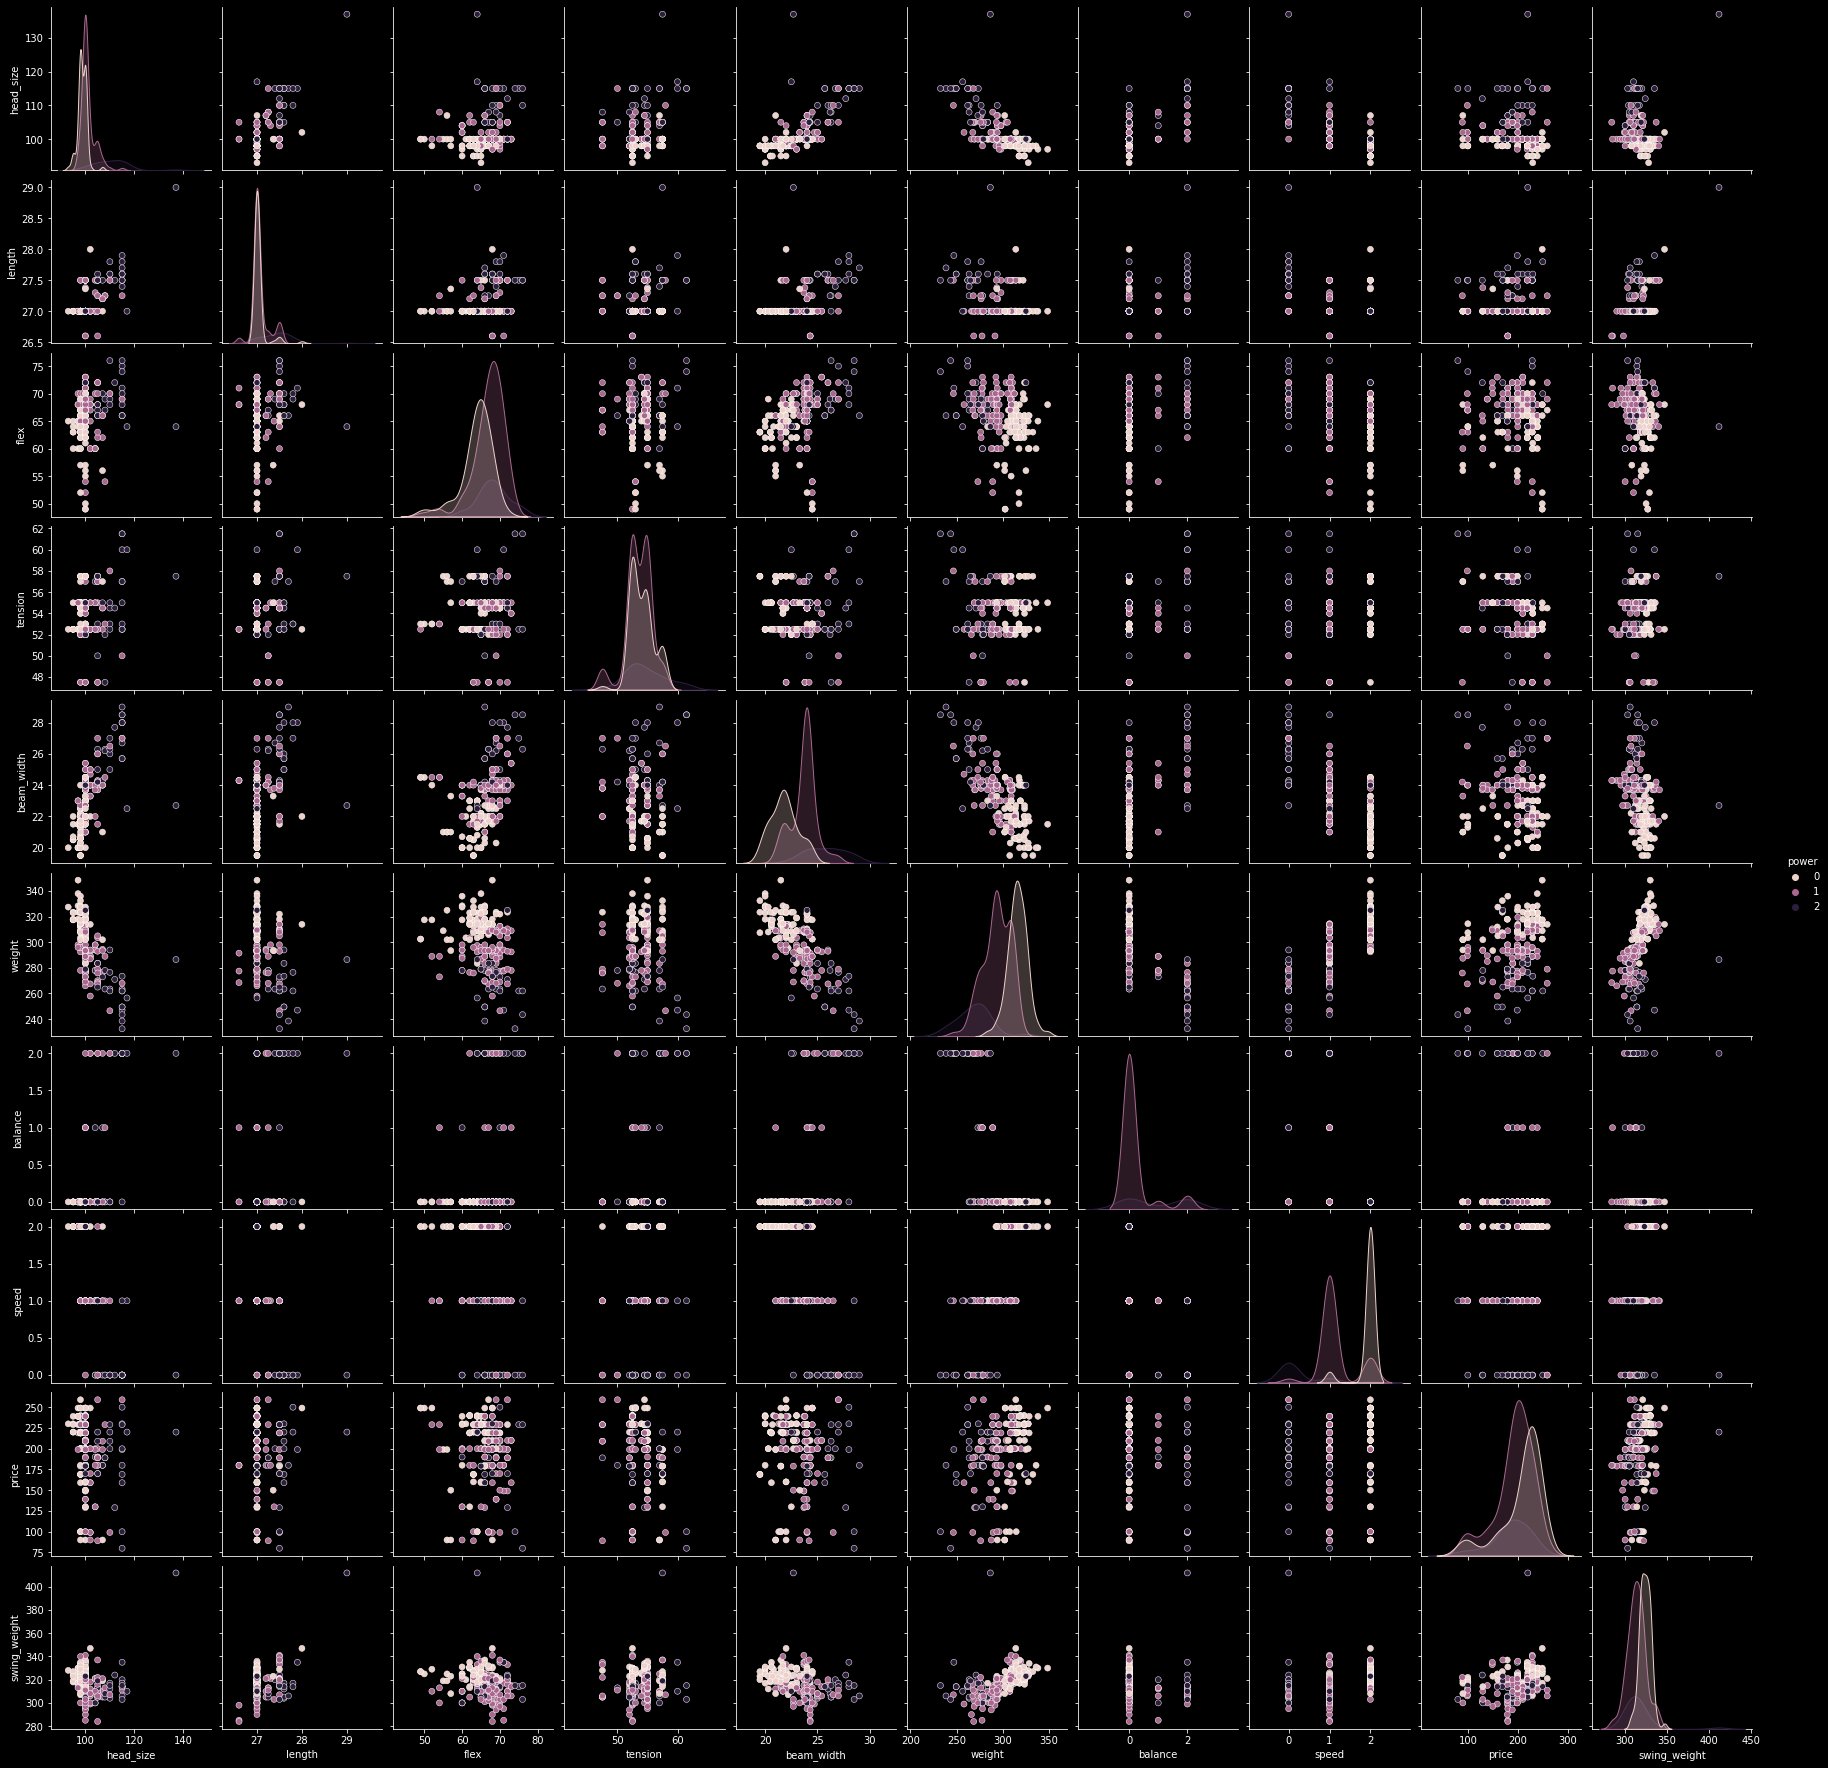

In [50]:
sns.pairplot(df, hue="power")

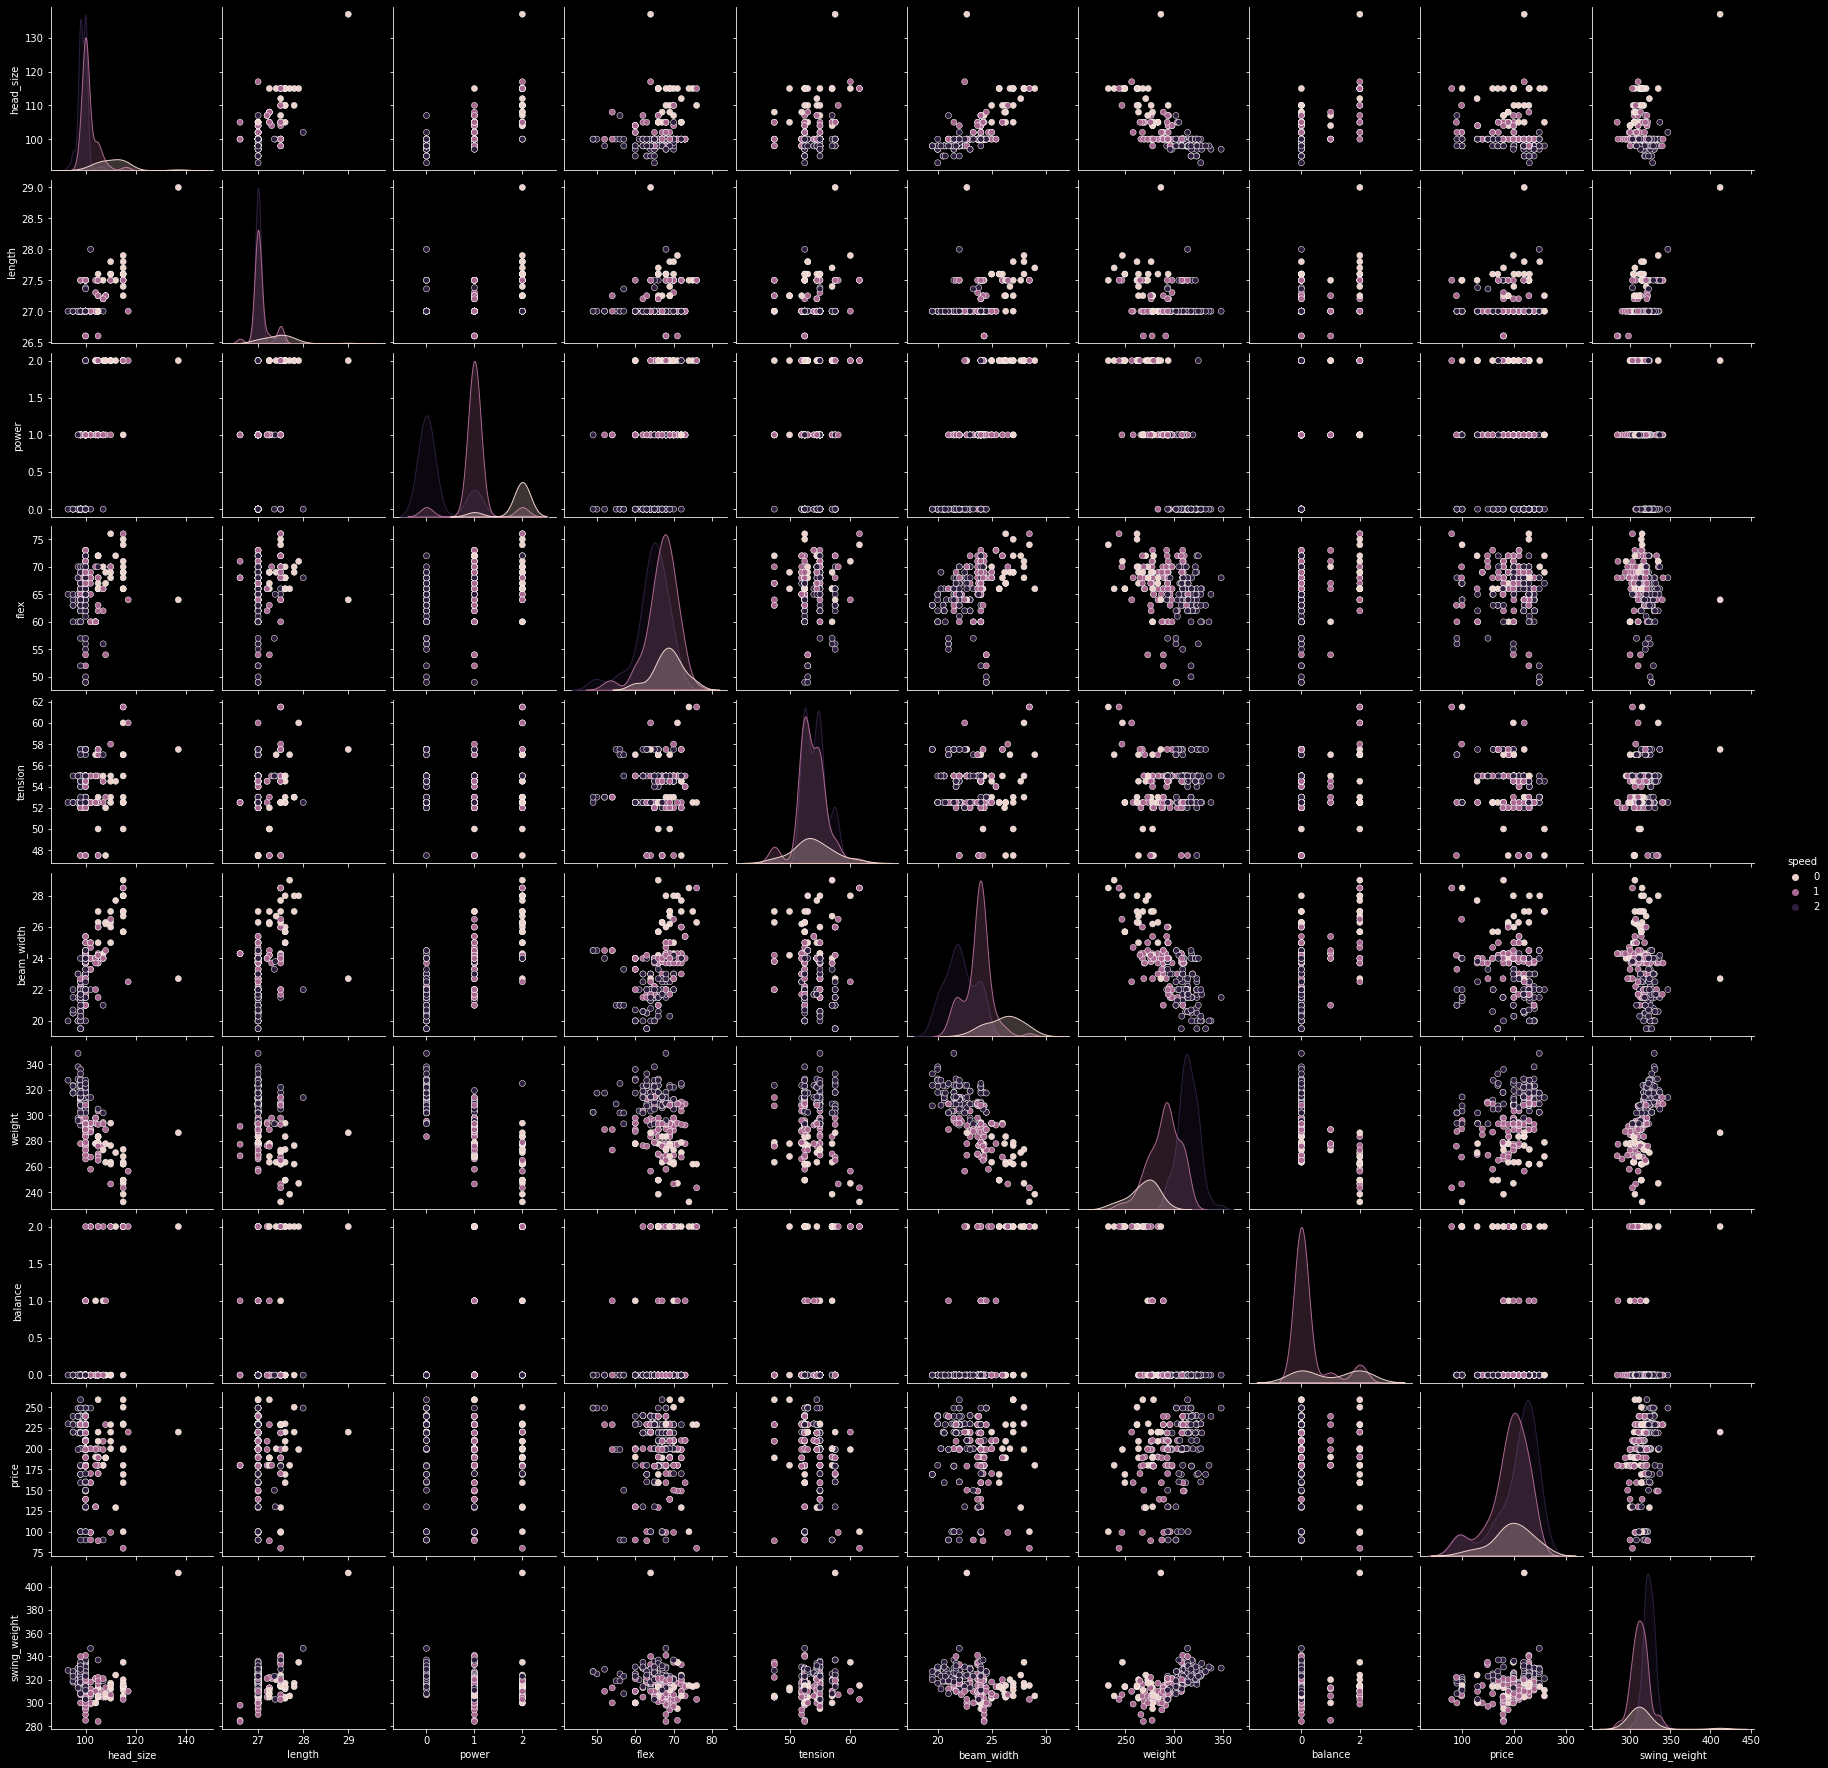

In [51]:
sns.pairplot(df, hue="speed")

<AxesSubplot:>

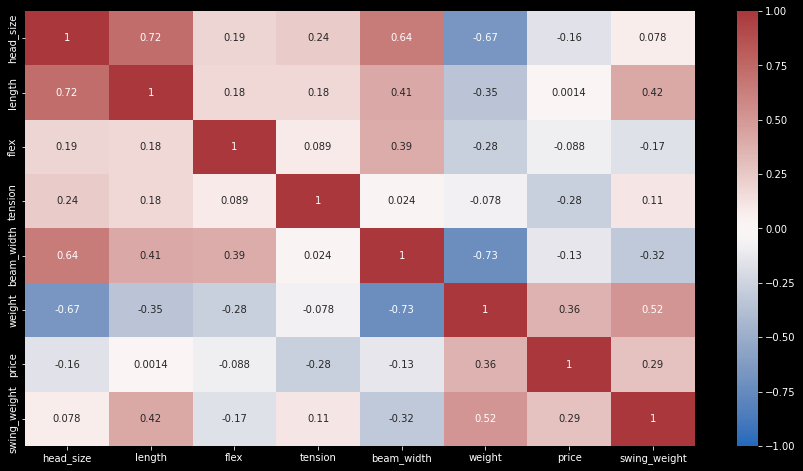

In [52]:
plt.figure(figsize=(15,8))
sns.heatmap(df[[
    "head_size", "length", "flex", "tension", "beam_width", 
    "weight", "composition", "price", "swing_weight"
]].corr(), cmap="vlag", vmin=-1, vmax=1, annot=True)

<font color="blue"><u>OBSERVATION</u></font>: There seems to be some significant and non-spurious correlation between some attributes. The scatter plots also show clustering in terms of power and speed. Thus, displaying data using a scatter plot would be most informative.

<font color="blue"><u>OBSERVATION</u></font>: To compare an attribute of one racquet with that of others, a histogram may be plotted.

<font color="blue"><u>OBSERVATION</u></font>: A way to judge the distribution of points in this dataset w.r.t. power/speed may be beneficial in gauging its soundness in terms of being a valid sample that represents the whole (i.e, whole population of tennis racquets in the world).

<font color="blue"><u>OBSERVATION</u></font>: A word cloud that shows all the different materials used to make the racquets can quickly help identify the most common materials used to make racquets. This information may be useful since it can be the case that racquets made using some materials provide better performance over those made with other materials.

## References

<b>J</b>
* (Jon Crim. (2014) "Tennis Racquet Head Size & Length", TennisCompanion. Link:https://tenniscompanion.org/tennis-racquet-head-size-and-length/. [Last Accessed:30/03/2022])

<b>T</b>
* Tennis Warehouse. (no date) <i>Tennis Racquet String Patterns Explained</i>, tennis-warehouse.com. Link: https://www.tennis-warehouse.com/learning_center/gear_guides/tennis_racquets/string_patterns_explained.html. [Last Accessed: 30/03/2022]